
# Session 06 Artificial Neural Networks | Exercise Solution


[**CCMVI2085U Machine Learning for Predictive Analytics in Business @ CBS ISUP 2020**](https://kursuskatalog.cbs.dk/2019-2020/KAN-CCMVI2085U.aspx?lang=en-GB)

Course coordinator: [Bowei Chen](https://boweichen.github.io/) | Email: [bc.acc@cbs.dk](mailto:bc.acc@cbs.dk)


-----

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Task 1: consumer segmentation

- Download `Holiday_Rental_Consumer_Segmentation.csv` dataset from the CBS OneDrive shared folder
- Prepare data with binary encoding and feature scaling 
- Implement the MLP using sklearn for classification

In [30]:
import pandas as pd

df = pd.read_csv("data/Holiday_Rental_Consumer_Segmentation.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
Price          191 non-null float64
Size           191 non-null float64
Bedroom        191 non-null int64
Bathroom       191 non-null int64
Floor          191 non-null int64
Car_Parking    191 non-null object
Internet       191 non-null object
Location       191 non-null object
Pet            191 non-null object
Event          191 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 15.0+ KB


<IPython.core.display.Javascript object>

In [31]:
for col, col_dtype in zip(df.columns, df.dtypes):
    print(
        f"======\n Variable :{col} \n Data type: {col_dtype} \n Unique values: {df[col].unique()} \n"
    )

 Variable :Price 
 Data type: float64 
 Unique values: [ 420.   660.   838.   900.   450.   485.   659.   440.   617.   545.
  665.   700.   570.   680.   950.   560.   600.   670.   510.   325.
  350.   470.   550.   639.   555.   780.   580.  1630.  1235.   599.
  790.  1250.   730.   635.   750.   945.  1065.  1160.  1170.   400.
  572.5  610.   800.   370.   620.  1300.   529.   480.   525.   500.
  699.   447.   575.   520.   539.   695.   720.   925.  1383.   785.
  708.   260.   645.   710.   462.   630.   649.   745.   650.   769.
  990.  1240.  1060.  1550.  1410.   595.   685.   860.  1750.  1200.
  820.   850.  1220.   840.   970.  1125.  1400.   747.   789.   869.
  770.   807.5  829.   760.   775.   870.   875.   890.  1000.   917.
 1745.   611.   585.5 1049.   749.   795.  1209.   476.   490.   605.
  930.   885.   880.   895.   955.   590.   715.   719.   589. ] 

 Variable :Size 
 Data type: float64 
 Unique values: [292.5  208.   194.   240.   360.   199.3  239.25 225.

<IPython.core.display.Javascript object>

In [32]:
x = pd.get_dummies(df.iloc[:, :-1], drop_first=True).to_numpy()
x

array([[420. , 292.5,   3. , ...,   0. ,   0. ,   0. ],
       [660. , 208. ,   3. , ...,   0. ,   0. ,   0. ],
       [660. , 194. ,   3. , ...,   1. ,   0. ,   0. ],
       ...,
       [660. , 250.5,   3. , ...,   0. ,   0. ,   0. ],
       [589. , 303. ,   2. , ...,   0. ,   0. ,   0. ],
       [710. , 384.3,   3. , ...,   0. ,   0. ,   0. ]])

<IPython.core.display.Javascript object>

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(df["Event"])
le.classes_
y = le.transform(df["Event"])
y

array([2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2])

<IPython.core.display.Javascript object>

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(x[:, :5])
x[:, :5] = ss.transform(x[:, :5])

<IPython.core.display.Javascript object>

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.4, random_state=100, stratify=y
)

<IPython.core.display.Javascript object>

In [36]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(max_iter=10000)

parameter_space = {
    "hidden_layer_sizes": [(50, 50, 50), (50, 100, 50), (100,)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.05],
    "learning_rate": ["constant", "adaptive"],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp_clf, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=10000), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

<IPython.core.display.Javascript object>

In [9]:
# Best paramete set
print("Best parameters found:\n", clf.best_params_)

# All results
means = clf.cv_results_["mean_test_score"]
stds = clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.842 (+/-0.074) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.833 (+/-0.050) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.842 (+/-0.129) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.833 (+/-0.066) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.860 (+/-0.138) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.825 (+/-0.050) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

<IPython.core.display.Javascript object>

In [37]:
y_true, y_pred = y_test, clf.predict(x_test)

from sklearn.metrics import classification_report

print("Results on the test set:")
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.84      0.73      0.78        22
           2       0.82      0.89      0.86        47

    accuracy                           0.82        77
   macro avg       0.79      0.75      0.77        77
weighted avg       0.82      0.82      0.82        77



<IPython.core.display.Javascript object>

## Task 2: stock prediction

- Download `DJI.csv` or `MSFT.csv` from the CBS OneDrive shared folder
- Split your training and test set based on a specific date
- Implement the MLP to predict the next day's price movement given the first day's price

In [38]:
df = pd.read_csv("data/DJI.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 7 columns):
Date         2517 non-null object
Open         2517 non-null float64
High         2517 non-null float64
Low          2517 non-null float64
Close        2517 non-null float64
Adj Close    2517 non-null float64
Volume       2517 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


<IPython.core.display.Javascript object>

In [39]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-06,9686.480469,9858.129883,9659.009766,9743.620117,9743.620117,261020000
1,2010-07-07,9743.620117,10026.599609,9736.700195,10018.280273,10018.280273,219560000
2,2010-07-08,10019.259766,10139.860352,10019.259766,10138.990234,10138.990234,192210000
3,2010-07-09,10138.990234,10201.769531,10118.410156,10198.030273,10198.030273,134810000
4,2010-07-12,10199.240234,10220.280273,10146.490234,10216.269531,10216.269531,131490000


<IPython.core.display.Javascript object>

Convert the variable Data into datetime type

```python
df["Date"] = pd.to_datetime(df["Date"])
```

In [40]:
df["Date"] = pd.to_datetime(df["Date"])

<IPython.core.display.Javascript object>

Set the variable Data to index of the dataset

```python
df = df.set_index(["Date"], drop=True)
```

In [41]:
df = df.set_index(["Date"], drop=True)

<IPython.core.display.Javascript object>

Scale variable Adj Close

```python
standard_scaler = StandardScaler()
price = df["Adj Close"].to_numpy().reshape(-1, 1)
standard_scaler.fit(price)
price_standard_scaler = standard_scaler.transform(price)

df["Adj Close Standard"] = price_standard_scaler
df.head()
```

In [42]:
standard_scaler = StandardScaler()
price = df["Adj Close"].to_numpy().reshape(-1, 1)
standard_scaler.fit(price)
price_standard_scaler = standard_scaler.transform(price)

df["Adj Close Standard"] = price_standard_scaler
df.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Close Standard
Date,,,,,,,
2010-07-06,9686.480469,9858.129883,9659.009766,9743.620117,9743.620117,261020000,-1.661031
2010-07-07,9743.620117,10026.599609,9736.700195,10018.280273,10018.280273,219560000,-1.608105
2010-07-08,10019.259766,10139.860352,10019.259766,10138.990234,10138.990234,192210000,-1.584844
2010-07-09,10138.990234,10201.769531,10118.410156,10198.030273,10198.030273,134810000,-1.573467
2010-07-12,10199.240234,10220.280273,10146.490234,10216.269531,10216.269531,131490000,-1.569952


<IPython.core.display.Javascript object>

Split the dataset at the date 2019-01-01

In [43]:
split_date = pd.Timestamp("2019-01-02")

<IPython.core.display.Javascript object>

In [44]:
train = df["Adj Close Standard"].loc[:split_date]
test = df["Adj Close Standard"].loc[split_date:]

<IPython.core.display.Javascript object>

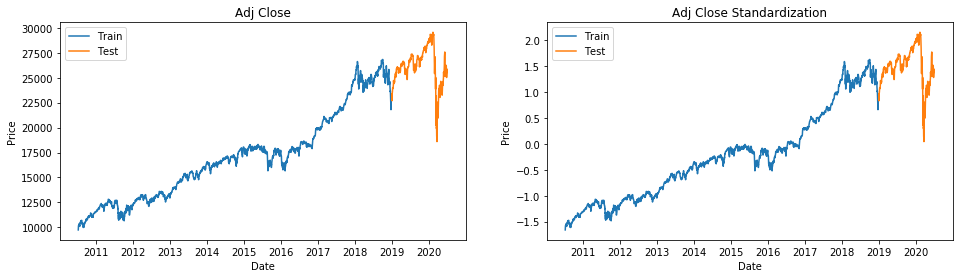

<IPython.core.display.Javascript object>

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(
    df["Adj Close"].loc[:split_date].index,
    df["Adj Close"].loc[:split_date],
    label="Train",
)
plt.plot(
    df["Adj Close"].loc[split_date:].index,
    df["Adj Close"].loc[split_date:],
    label="Test",
)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Adj Close")

plt.subplot(1, 2, 2)
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Adj Close Standardization")

plt.show()

Create the input and response variables. Here the input is one day prior to the response.

```python
x_train = train.to_numpy()[:-1].reshape(-1, 1)
y_train = train.to_numpy()[1:].flatten()

x_test = test.to_numpy()[:-1].reshape(-1, 1)
y_test = test.to_numpy()[1:].flatten()
```

In [46]:
x_train = train.to_numpy()[:-1].reshape(-1, 1)
y_train = train.to_numpy()[1:].flatten()

x_test = test.to_numpy()[:-1].reshape(-1, 1)
y_test = test.to_numpy()[1:].flatten()

<IPython.core.display.Javascript object>

Train the `MLPRegressor` from `sklearn`

```python
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=100, max_iter=10000).fit(x_train, y_train)
```

In [47]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state=100, max_iter=10000).fit(x_train, y_train)

<IPython.core.display.Javascript object>

In [48]:
y_predlabel_train = mlp_reg.predict(x_train)
y_predlabel_test = mlp_reg.predict(x_test)

<IPython.core.display.Javascript object>

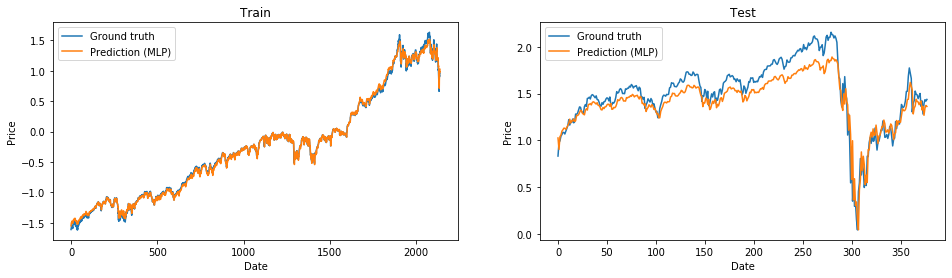

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(range(len(y_train)), y_train, label="Ground truth")
plt.plot(range(len(y_predlabel_train)), y_predlabel_train, label="Prediction (MLP)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Train")

plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test, label="Ground truth")
plt.plot(range(len(y_predlabel_test)), y_predlabel_test, label="Prediction (MLP)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("Test")

plt.show()

In [51]:
from sklearn.metrics import mean_squared_error

print(
    "Mean squared error (train): {}".format(
        mean_squared_error(y_train, y_predlabel_train)
    )
)
print(
    "Mean squared error (test): {}".format(mean_squared_error(y_test, y_predlabel_test))
)

Mean squared error (train): 0.0014921846694880675
Mean squared error (test): 0.020510939299903174


<IPython.core.display.Javascript object>